In [ ]:
pip install kaggle --upgrade

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle competitions download -c b8competition1

  0% 0.00/39.8k [00:00<?, ?B/s]
100% 39.8k/39.8k [00:00<00:00, 16.1MB/s]
  0% 0.00/271k [00:00<?, ?B/s]
100% 271k/271k [00:00<00:00, 38.5MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings(action='ignore')

In [ ]:
train = pd.read_csv('/content/changingjob_train.csv.zip')
train

,Unnamed: 0,Unnamed: 0.1,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0,0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,30,NaN,Other,1,36,1
1,1,1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,3.0,Pvt Ltd,>4,47,0
2,2,2,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,NaN,Other,never,83,0
3,3,3,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,30,3.0,Funded Startup,4,8,0
4,4,4,city_176,0.764,Other,Has relevent experience,Part time course,Graduate,STEM,11,NaN,Other,1,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18121,18121,18121,city_103,0.920,Female,No relevent experience,no_enrollment,Phd,STEM,17,4.0,NGO,4,16,0
18122,18122,18122,city_21,0.624,Other,No relevent experience,Full time course,UH,NaN,9,NaN,Other,1,68,1
18123,18123,18123,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,30,2.0,Pvt Ltd,>4,110,0
18124,18124,18124,city_75,0.939,Male,Has relevent experience,no_enrollment,Masters,STEM,14,8.0,Pvt Ltd,1,82,0


In [ ]:
train.head()

,Unnamed: 0,Unnamed: 0.1,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0,0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,30,NaN,Other,1,36,1
1,1,1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,3.0,Pvt Ltd,>4,47,0
2,2,2,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,NaN,Other,never,83,0
3,3,3,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,30,3.0,Funded Startup,4,8,0
4,4,4,city_176,0.764,Other,Has relevent experience,Part time course,Graduate,STEM,11,NaN,Other,1,24,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18126 entries, 0 to 18125
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              18126 non-null  int64  
 1   Unnamed: 0.1            18126 non-null  int64  
 2   city                    18126 non-null  object 
 3   city_development_Index  18126 non-null  float64
 4   gender                  18126 non-null  object 
 5   relevent_experience     18126 non-null  object 
 6   enrolled_university     18126 non-null  object 
 7   education_level         18126 non-null  object 
 8   major_discipline        15554 non-null  object 
 9   experience              18126 non-null  int64  
 10  company_size            12629 non-null  float64
 11  company_type            18126 non-null  object 
 12  last_new_job            18126 non-null  object 
 13  training_hours          18126 non-null  int64  
 14  target                  18126 non-null

In [ ]:
train.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
train.drop('Unnamed: 0.1',axis=1,inplace=True)

In [ ]:
df = train
for c in df.columns:
    if df[c].dtype=='object': 
      df[c] = df[c].fillna('N')
      lbl = LabelEncoder()
      lbl.fit(list(df[c].values))
      df[c] = lbl.transform(df[c].values)

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.isnull().sum()

city                      0
city_development_Index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [ ]:
corr_matrix=df.corr()

In [ ]:
corr_matrix['target'].abs().sort_values(ascending=False)

target                    1.000000
city_development_Index    0.424703
experience                0.181149
city                      0.099486
enrolled_university       0.088463
gender                    0.069721
major_discipline          0.066076
education_level           0.059277
last_new_job              0.047429
relevent_experience       0.039110
training_hours            0.011436
company_size              0.008337
company_type              0.002336
Name: target, dtype: float64

In [ ]:
df.describe()

,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,12629.000000,12629.000000,12629.000000,12629.000000,12629.000000,12629.000000,12629.000000,12629.000000,12629.000000,12629.000000,12629.000000,12629.000000,12629.000000
mean,43.542878,0.835828,1.155040,0.150606,1.674242,0.553567,4.573759,12.425370,4.258453,4.162483,2.493230,65.731333,0.177449
std,35.397362,0.120458,0.518919,0.357678,0.691126,0.886540,1.048346,9.396321,2.192552,1.519293,1.766919,60.694908,0.382063
min,0.000000,0.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.000000,0.754000,1.000000,0.000000,2.000000,0.000000,5.000000,5.000000,3.000000,4.000000,1.000000,23.000000,0.000000
50%,48.000000,0.910000,1.000000,0.000000,2.000000,0.000000,5.000000,10.000000,4.000000,5.000000,2.000000,47.000000,0.000000
75%,64.000000,0.920000,1.000000,0.000000,2.000000,1.000000,5.000000,16.000000,6.000000,5.000000,4.000000,89.000000,0.000000
max,122.000000,0.949000,2.000000,1.000000,2.000000,3.000000,5.000000,30.000000,8.000000,5.000000,6.000000,336.000000,1.000000


In [ ]:
# data
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import parallel_coordinates

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# grid search
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2,random_state=42)

In [ ]:
ss = StandardScaler() # Scaling
X_train_s = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
X_test_s = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)
X_train_s.head()

,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,-1.081096,0.697537,-0.300173,-0.417889,0.467295,-0.627570,0.408397,0.058550,0.785751,-1.426437,-0.842988,-0.834390
1,-1.109298,-0.266055,1.627766,2.392982,0.467295,0.500604,0.408397,-0.686586,1.696488,0.553862,1.417135,-0.423006
2,-1.081096,0.697537,-0.300173,2.392982,-2.446053,2.756953,-1.474778,-0.793034,1.696488,0.553862,-0.842988,-0.176175
3,-1.109298,-0.266055,-0.300173,-0.417889,0.467295,0.500604,0.408397,-0.047898,1.241120,0.553862,-0.277957,0.021290
4,0.131601,0.614468,-0.300173,-0.417889,0.467295,-0.627570,0.408397,0.058550,-1.035724,-2.086536,-0.277957,0.597228


In [ ]:
X_train_s['city_development_Index'] = X_train_s['city_development_Index'] * 0.424703
X_train_s['experience'] = X_train_s['experience'] * 0.181149
X_train_s['enrolled_university'] = X_train_s['enrolled_university'] * 0.099486
X_train_s['relevent_experience'] = X_train_s['relevent_experience'] * 0.088463
X_train_s['company_type'] = X_train_s['company_type'] * 0.069721
X_train_s['education_level'] = X_train_s['education_level'] * 0.066076
X_train_s['gender'] = X_train_s['gender'] * 0.059277
X_train_s['city'] = X_train_s['city'] * 0.047429
X_train_s['last_new_job'] = X_train_s['last_new_job'] * 0.039110
X_train_s['training_hours'] = X_train_s['training_hours'] * 0.011436
X_train_s['company_size'] = X_train_s['company_size'] * 0.008337
X_train_s['major_discipline'] = X_train_s['major_discipline'] * 0.002336

In [ ]:
X_test_s['city_development_Index'] = X_test_s['city_development_Index'] *  0.424703
X_test_s['experience'] = X_test_s['experience'] * 0.181149
X_test_s['enrolled_university'] = X_test_s['enrolled_university'] * 0.099486
X_test_s['relevent_experience'] = X_test_s['relevent_experience'] * 0.088463
X_test_s['company_type'] = X_test_s['company_type'] * 0.069721
X_test_s['education_level'] = X_test_s['education_level'] * 0.066076
X_test_s['gender'] = X_test_s['gender'] * 0.059277
X_test_s['city'] = X_test_s['city'] * 0.047429
X_test_s['last_new_job'] = X_test_s['last_new_job'] * 0.039110
X_test_s['training_hours'] = X_test_s['training_hours'] * 0.011436
X_test_s['company_size'] = X_test_s['company_size'] * 0.008337
X_test_s['major_discipline'] = X_test_s['major_discipline'] * 0.002336

In [ ]:
def print_metrics(model, X_train):
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print('*** Cross val score *** \n   {}'.format(scores))
    print('\n*** Mean Accuracy *** \n   {:.7f}'.format(scores.mean()))

In [ ]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]

In [ ]:
alpha_list=[10,15,20,25,30,35,40,45]
for alpha in alpha_list:
  knn_s = KNeighborsClassifier(n_neighbors=alpha)
  knn_s.fit(X_train_s, y_train)
  train_score.append(knn_s.score(X_train_s, y_train))
  test_score.append(knn_s.score(X_test_s, y_test))

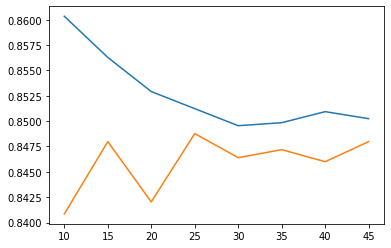

In [ ]:
plt.plot((alpha_list), train_score)
plt.plot((alpha_list), test_score)
plt.show()

In [ ]:
knn_s = KNeighborsClassifier(n_jobs=-1, n_neighbors=25)
knn_s.fit(X_train_s, y_train)
print_metrics(knn_s, X_train_s)

*** Cross val score *** 
   [0.84272997 0.83580613 0.82987141 0.84752475 0.84356436 0.85049505
 0.85049505 0.86336634 0.82574257 0.83069307]

*** Mean Accuracy *** 
   0.8420289


In [ ]:
pred = knn_s.predict(X_test_s)
print(accuracy_score(y_test,pred))

0.8487727632620744


In [ ]:
# Minmax Scaler
ms = MinMaxScaler()
X_train_m = pd.DataFrame(ms.fit_transform(X_train), columns = X_train.columns)
X_test_m = pd.DataFrame(ms.transform(X_test), columns = X_test.columns)
X_train_m.head()

,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.040984,0.942116,0.5,0.0,1.0,0.000000,1.0,0.433333,0.714286,0.4,0.166667,0.041791
1,0.032787,0.710579,1.0,1.0,1.0,0.333333,1.0,0.200000,1.000000,1.0,0.833333,0.116418
2,0.040984,0.942116,0.5,1.0,0.0,1.000000,0.6,0.166667,1.000000,1.0,0.166667,0.161194
3,0.032787,0.710579,0.5,0.0,1.0,0.333333,1.0,0.400000,0.857143,1.0,0.333333,0.197015
4,0.393443,0.922156,0.5,0.0,1.0,0.000000,1.0,0.433333,0.142857,0.2,0.333333,0.301493


In [ ]:
X_train_m['city_development_Index'] = X_train_m['city_development_Index'] * 0.424703
X_train_m['experience'] = X_train_m['experience'] * 0.181149
X_train_m['enrolled_university'] = X_train_m['enrolled_university'] * 0.099486
X_train_m['relevent_experience'] = X_train_m['relevent_experience'] * 0.088463
X_train_m['company_type'] = X_train_m['company_type'] * 0.069721
X_train_m['education_level'] = X_train_m['education_level'] * 0.066076
X_train_m['gender'] = X_train_m['gender'] * 0.059277
X_train_m['city'] = X_train_m['city'] * 0.047429
X_train_m['last_new_job'] = X_train_m['last_new_job'] * 0.039110
X_train_m['training_hours'] = X_train_m['training_hours'] * 0.011436
X_train_m['company_size'] = X_train_m['company_size'] * 0.008337
X_train_m['major_discipline'] = X_train_m['major_discipline'] * 0.002336

In [ ]:
X_test_m['city_development_Index'] = X_test_m['city_development_Index'] *  0.424703
X_test_m['experience'] = X_test_m['experience'] * 0.181149
X_test_m['enrolled_university'] = X_test_m['enrolled_university'] * 0.099486
X_test_m['relevent_experience'] = X_test_m['relevent_experience'] * 0.088463
X_test_m['company_type'] = X_test_m['company_type'] * 0.069721
X_test_m['education_level'] = X_test_m['education_level'] * 0.066076
X_test_m['gender'] = X_test_m['gender'] * 0.059277
X_test_m['city'] = X_test_m['city'] * 0.047429
X_test_m['last_new_job'] = X_test_m['last_new_job'] * 0.039110
X_test_m['training_hours'] = X_test_m['training_hours'] * 0.011436
X_test_m['company_size'] = X_test_m['company_size'] * 0.008337
X_test_m['major_discipline'] = X_test_m['major_discipline'] * 0.002336

In [ ]:
knn_m = KNeighborsClassifier(n_jobs=-1, n_neighbors=25)
knn_m.fit(X_train_m, y_train)
print_metrics(knn_m, X_train_m)

*** Cross val score *** 
   [0.83580613 0.83382789 0.83481701 0.84554455 0.83960396 0.84257426
 0.84851485 0.86237624 0.82673267 0.83267327]

*** Mean Accuracy *** 
   0.8402471


In [ ]:
pred = knn_m.predict(X_test_m)
print(accuracy_score(y_test,pred))

0.8483768804433888


In [ ]:
test = pd.read_csv('/content/changingjob_testx.csv')
test.head()

,Unnamed: 0,Unnamed: 0.1,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0,18126,city_128,0.527,Other,Has relevent experience,no_enrollment,Graduate,STEM,4,3.0,Pvt Ltd,4,36
1,1,18127,city_114,0.926,Other,Has relevent experience,no_enrollment,Graduate,STEM,16,4.0,Pvt Ltd,>4,8
2,2,18128,city_114,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,8.0,Pvt Ltd,4,35
3,3,18129,city_67,0.855,Male,Has relevent experience,no_enrollment,Graduate,STEM,0,NaN,Other,1,41
4,4,18130,city_100,0.887,Male,Has relevent experience,no_enrollment,Graduate,STEM,2,5.0,Pvt Ltd,2,17


In [ ]:
test.drop('Unnamed: 0',axis=1,inplace=True)
test.drop('Unnamed: 0.1',axis=1,inplace=True)

In [ ]:
test.isnull().sum()

city                        0
city_development_Index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline           57
experience                  0
company_size              121
company_type                0
last_new_job                0
training_hours              0
dtype: int64

In [ ]:
test.head()

,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_128,0.527,Other,Has relevent experience,no_enrollment,Graduate,STEM,4,3.0,Pvt Ltd,4,36
1,city_114,0.926,Other,Has relevent experience,no_enrollment,Graduate,STEM,16,4.0,Pvt Ltd,>4,8
2,city_114,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,8.0,Pvt Ltd,4,35
3,city_67,0.855,Male,Has relevent experience,no_enrollment,Graduate,STEM,0,NaN,Other,1,41
4,city_100,0.887,Male,Has relevent experience,no_enrollment,Graduate,STEM,2,5.0,Pvt Ltd,2,17


In [ ]:
test.isnull().sum()

city                        0
city_development_Index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline           57
experience                  0
company_size              121
company_type                0
last_new_job                0
training_hours              0
dtype: int64

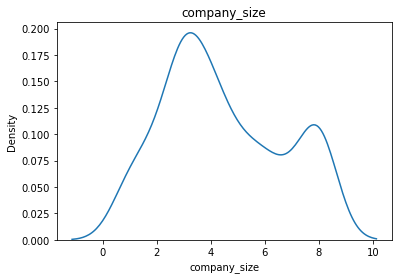

In [ ]:
def num_compare2(num_col):
    sns.kdeplot(data=test,x=test[num_col])
    plt.title(num_col)
    plt.show()
num_compare2('company_size')

In [ ]:
test['company_size']=test['company_size'].fillna(3)

In [ ]:
df = test
for c in test.columns:
    if test[c].dtype=='object': 
      df[c] = df[c].fillna('N')
      lbl = LabelEncoder()
      lbl.fit(list(test[c].values))
      test[c] = lbl.transform(test[c].values)
        
df=test

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    400 non-null    int64  
 1   city_development_Index  400 non-null    float64
 2   gender                  400 non-null    int64  
 3   relevent_experience     400 non-null    int64  
 4   enrolled_university     400 non-null    int64  
 5   education_level         400 non-null    int64  
 6   major_discipline        400 non-null    int64  
 7   experience              400 non-null    int64  
 8   company_size            400 non-null    float64
 9   company_type            400 non-null    int64  
 10  last_new_job            400 non-null    int64  
 11  training_hours          400 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 37.6 KB


In [ ]:
# standard Scaler
ss = StandardScaler()
X_train_s = pd.DataFrame(ss.fit_transform(test), columns = test.columns)
X_train_s.head()

,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,-0.488532,-2.370030,1.525540,-0.612022,0.557569,-0.635875,0.501849,-0.807663,-0.517351,0.777378,0.669038,-0.494048
1,-0.762372,0.788770,1.525540,-0.612022,0.557569,-0.635875,0.501849,0.470538,-0.003851,0.777378,1.179754,-0.932957
2,-0.762372,0.788770,-0.381385,-0.612022,0.557569,-0.635875,0.501849,0.044471,2.050149,0.777378,0.669038,-0.509723
3,1.483121,0.226678,-0.381385,-0.612022,0.557569,-0.635875,0.501849,-1.233730,-0.517351,-0.754402,-0.863110,-0.415671
4,-1.200517,0.480015,-0.381385,-0.612022,0.557569,-0.635875,0.501849,-1.020697,0.509649,0.777378,-0.352394,-0.791879


In [ ]:
X_train_s['city_development_Index'] = X_train_s['city_development_Index'] * 0.424703
X_train_s['experience'] = X_train_s['experience'] * 0.181149
X_train_s['enrolled_university'] = X_train_s['enrolled_university'] * 0.099486
X_train_s['relevent_experience'] = X_train_s['relevent_experience'] * 0.088463
X_train_s['company_type'] = X_train_s['company_type'] * 0.069721
X_train_s['education_level'] = X_train_s['education_level'] * 0.066076
X_train_s['gender'] = X_train_s['gender'] * 0.059277
X_train_s['city'] = X_train_s['city'] * 0.047429
X_train_s['last_new_job'] = X_train_s['last_new_job'] * 0.039110
X_train_s['training_hours'] = X_train_s['training_hours'] * 0.011436
X_train_s['company_size'] = X_train_s['company_size'] * 0.008337
X_train_s['major_discipline'] = X_train_s['major_discipline'] * 0.002336

In [ ]:
X_test_s['city_development_Index'] = X_test_s['city_development_Index'] *  0.424703
X_test_s['experience'] = X_test_s['experience'] * 0.181149
X_test_s['enrolled_university'] = X_test_s['enrolled_university'] * 0.099486
X_test_s['relevent_experience'] = X_test_s['relevent_experience'] * 0.088463
X_test_s['company_type'] = X_test_s['company_type'] * 0.069721
X_test_s['education_level'] = X_test_s['education_level'] * 0.066076
X_test_s['gender'] = X_test_s['gender'] * 0.059277
X_test_s['city'] = X_test_s['city'] * 0.047429
X_test_s['last_new_job'] = X_test_s['last_new_job'] * 0.039110
X_test_s['training_hours'] = X_test_s['training_hours'] * 0.011436
X_test_s['company_size'] = X_test_s['company_size'] * 0.008337
X_test_s['major_discipline'] = X_test_s['major_discipline'] * 0.002336

In [ ]:
pred_test = knn_s.predict(X_train_s)
pred_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [ ]:
y_pred = pd.DataFrame(pred_test)
y_pred.columns =['target']
y_pred['index'] = y_pred.index
y_pred = y_pred[['index', 'target']]

y_pred.to_csv("submit.csv", header=True, index=False)

In [ ]:
submit = pd.read_csv("submit.csv")

In [ ]:
submit.describe()

,index,target
count,400.000000,400.000000
mean,199.500000,0.157500
std,115.614301,0.364728
min,0.000000,0.000000
25%,99.750000,0.000000
50%,199.500000,0.000000
75%,299.250000,0.000000
max,399.000000,1.000000


In [ ]:
#!kaggle competitions submit -c b8competition1 -f ./content/submit.csv -m 'first commit knn model no parameter tuning'

SVM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
train = pd.read_csv('/content/changingjob_train.csv')

In [ ]:
train.drop('Unnamed: 0',axis=1,inplace=True)
train.drop('Unnamed: 0.1',axis=1,inplace=True)
train = train.dropna(axis=0)

In [ ]:
df = train
for c in df.columns:
    if df[c].dtype=='object': 
      df[c] = df[c].fillna('N')
      lbl = LabelEncoder()
      lbl.fit(list(df[c].values))
      df[c] = lbl.transform(df[c].values)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], random_state=42)

In [ ]:
ss = StandardScaler() # Scaling
X_train_s = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
X_test_s = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)

In [ ]:
X_train_s['city_development_Index'] = X_train_s['city_development_Index'] * 0.424703
X_train_s['experience'] = X_train_s['experience'] * 0.181149
X_train_s['enrolled_university'] = X_train_s['enrolled_university'] * 0.099486
X_train_s['relevent_experience'] = X_train_s['relevent_experience'] * 0.088463
X_train_s['company_type'] = X_train_s['company_type'] * 0.069721
X_train_s['education_level'] = X_train_s['education_level'] * 0.066076
X_train_s['gender'] = X_train_s['gender'] * 0.059277
X_train_s['city'] = X_train_s['city'] * 0.047429
X_train_s['last_new_job'] = X_train_s['last_new_job'] * 0.039110
X_train_s['training_hours'] = X_train_s['training_hours'] * 0.011436
X_train_s['company_size'] = X_train_s['company_size'] * 0.008337
X_train_s['major_discipline'] = X_train_s['major_discipline'] * 0.002336

In [ ]:
X_test_s['city_development_Index'] = X_test_s['city_development_Index'] *  0.424703
X_test_s['experience'] = X_test_s['experience'] * 0.181149
X_test_s['enrolled_university'] = X_test_s['enrolled_university'] * 0.099486
X_test_s['relevent_experience'] = X_test_s['relevent_experience'] * 0.088463
X_test_s['company_type'] = X_test_s['company_type'] * 0.069721
X_test_s['education_level'] = X_test_s['education_level'] * 0.066076
X_test_s['gender'] = X_test_s['gender'] * 0.059277
X_test_s['city'] = X_test_s['city'] * 0.047429
X_test_s['last_new_job'] = X_test_s['last_new_job'] * 0.039110
X_test_s['training_hours'] = X_test_s['training_hours'] * 0.011436
X_test_s['company_size'] = X_test_s['company_size'] * 0.008337
X_test_s['major_discipline'] = X_test_s['major_discipline'] * 0.002336

In [ ]:
svc_weight=SVC()
svc_weight.fit(X_train_s,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_weight = svc_weight.predict(X_test_s)
print(accuracy_score(y_test,y_pred_weight))

0.8421234057221648


In [ ]:
ms = MinMaxScaler()
X_train_m = pd.DataFrame(ms.fit_transform(X_train), columns = X_train.columns)
X_test_m = pd.DataFrame(ms.transform(X_test), columns = X_test.columns)

In [ ]:
X_train_m['city_development_Index'] = X_train_m['city_development_Index'] * 0.424703
X_train_m['experience'] = X_train_m['experience'] * 0.181149
X_train_m['enrolled_university'] = X_train_m['enrolled_university'] * 0.099486
X_train_m['relevent_experience'] = X_train_m['relevent_experience'] * 0.088463
X_train_m['company_type'] = X_train_m['company_type'] * 0.069721
X_train_m['education_level'] = X_train_m['education_level'] * 0.066076
X_train_m['gender'] = X_train_m['gender'] * 0.059277
X_train_m['city'] = X_train_m['city'] * 0.047429
X_train_m['last_new_job'] = X_train_m['last_new_job'] * 0.039110
X_train_m['training_hours'] = X_train_m['training_hours'] * 0.011436
X_train_m['company_size'] = X_train_m['company_size'] * 0.008337
X_train_m['major_discipline'] = X_train_m['major_discipline'] * 0.002336

In [ ]:
X_test_m['city_development_Index'] = X_test_m['city_development_Index'] *  0.424703
X_test_m['experience'] = X_test_m['experience'] * 0.181149
X_test_m['enrolled_university'] = X_test_m['enrolled_university'] * 0.099486
X_test_m['relevent_experience'] = X_test_m['relevent_experience'] * 0.088463
X_test_m['company_type'] = X_test_m['company_type'] * 0.069721
X_test_m['education_level'] = X_test_m['education_level'] * 0.066076
X_test_m['gender'] = X_test_m['gender'] * 0.059277
X_test_m['city'] = X_test_m['city'] * 0.047429
X_test_m['last_new_job'] = X_test_m['last_new_job'] * 0.039110
X_test_m['training_hours'] = X_test_m['training_hours'] * 0.011436
X_test_m['company_size'] = X_test_m['company_size'] * 0.008337
X_test_m['major_discipline'] = X_test_m['major_discipline'] * 0.002336

In [ ]:
svc_weight_m=SVC()
svc_weight_m.fit(X_train_m,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_weight = svc_weight_m.predict(X_test_m)
print(accuracy_score(y_test,y_pred_weight))

0.8369527749052051


In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100] }

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# GridSearchCV
model = SVC()
grid_search = GridSearchCV(model, param_grid, cv=3,n_jobs=-1)

# grid_search.fit
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("최적 매개변수: {}".format(grid_search.best_params_))

최적 매개변수: {'C': 1, 'gamma': 10}


In [ ]:
svc_weight=SVC(C=1, gamma= 10)
svc_weight.fit(X_train_s,y_train)
y_pred_weight = svc_weight.predict(X_test_s)
print(accuracy_score(y_test,y_pred_weight))

0.8421234057221648


In [ ]:
test = pd.read_csv('/content/changingjob_testx.csv')
test

,Unnamed: 0,Unnamed: 0.1,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0,18126,city_128,0.527,Other,Has relevent experience,no_enrollment,Graduate,STEM,4,3.0,Pvt Ltd,4,36
1,1,18127,city_114,0.926,Other,Has relevent experience,no_enrollment,Graduate,STEM,16,4.0,Pvt Ltd,>4,8
2,2,18128,city_114,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,8.0,Pvt Ltd,4,35
3,3,18129,city_67,0.855,Male,Has relevent experience,no_enrollment,Graduate,STEM,0,NaN,Other,1,41
4,4,18130,city_100,0.887,Male,Has relevent experience,no_enrollment,Graduate,STEM,2,5.0,Pvt Ltd,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,18521,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,Other,1,42
396,396,18522,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,Other,4,52
397,397,18523,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,30,3.0,Pvt Ltd,4,44
398,398,18524,city_65,0.802,Male,Has relevent experience,no_enrollment,UH,NaN,0,5.0,Pvt Ltd,2,97


In [ ]:
test.drop('Unnamed: 0',axis=1,inplace=True)
test.drop('Unnamed: 0.1',axis=1,inplace=True)

In [ ]:
df=test
for c in test.columns:
    if test[c].dtype=='object': 
      df[c] = df[c].fillna('N')
      lbl = LabelEncoder()
      lbl.fit(list(test[c].values))
      test[c] = lbl.transform(test[c].values)
        
df=test

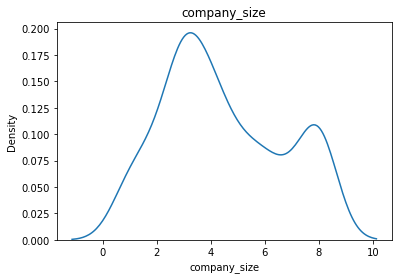

In [ ]:
def num_compare2(num_col):
    sns.kdeplot(data=test,x=test[num_col])
    plt.title(num_col)
    plt.show()
num_compare2('company_size')

In [ ]:
df['company_size']=df['company_size'].fillna(3)

In [ ]:
# Minmax Scaler
ss = StandardScaler()
X_train_s = pd.DataFrame(ss.fit_transform(df), columns = df.columns)
X_train_s.head()

,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,-0.488532,-2.370030,1.525540,-0.612022,0.557569,-0.635875,0.501849,-0.807663,-0.517351,0.777378,0.669038,-0.494048
1,-0.762372,0.788770,1.525540,-0.612022,0.557569,-0.635875,0.501849,0.470538,-0.003851,0.777378,1.179754,-0.932957
2,-0.762372,0.788770,-0.381385,-0.612022,0.557569,-0.635875,0.501849,0.044471,2.050149,0.777378,0.669038,-0.509723
3,1.483121,0.226678,-0.381385,-0.612022,0.557569,-0.635875,0.501849,-1.233730,-0.517351,-0.754402,-0.863110,-0.415671
4,-1.200517,0.480015,-0.381385,-0.612022,0.557569,-0.635875,0.501849,-1.020697,0.509649,0.777378,-0.352394,-0.791879


In [ ]:
X_train_s['city_development_Index'] = X_train_s['city_development_Index'] * 0.424703
X_train_s['experience'] = X_train_s['experience'] * 0.181149
X_train_s['enrolled_university'] = X_train_s['enrolled_university'] * 0.099486
X_train_s['relevent_experience'] = X_train_s['relevent_experience'] * 0.088463
X_train_s['company_type'] = X_train_s['company_type'] * 0.069721
X_train_s['education_level'] = X_train_s['education_level'] * 0.066076
X_train_s['gender'] = X_train_s['gender'] * 0.059277
X_train_s['city'] = X_train_s['city'] * 0.047429
X_train_s['last_new_job'] = X_train_s['last_new_job'] * 0.039110
X_train_s['training_hours'] = X_train_s['training_hours'] * 0.011436
X_train_s['company_size'] = X_train_s['company_size'] * 0.008337
X_train_s['major_discipline'] = X_train_s['major_discipline'] * 0.002336

In [ ]:
pred_test = svc_weight.predict(X_train_s)
pred_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [ ]:
y_pred = pd.DataFrame(pred_test)
y_pred.columns =['target']
y_pred['index'] = y_pred.index
y_pred = y_pred[['index', 'target']]

y_pred.to_csv("submit_SVC.csv", header=True, index=False)

In [ ]:
submit = pd.read_csv("submit_SVC.csv")
submit

,index,target
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
395,395,0
396,396,0
397,397,0
398,398,0


In [ ]:
submit.describe()

,index,target
count,400.000000,400.000000
mean,199.500000,0.185000
std,115.614301,0.388784
min,0.000000,0.000000
25%,99.750000,0.000000
50%,199.500000,0.000000
75%,299.250000,0.000000
max,399.000000,1.000000


In [ ]:
!kaggle competitions submit -c b8competition1 -f ./content/submit_SVC.csv -m 'commit svc model'